In [1]:
import sys
import os
import system_config as sc

system_configuration = sc.get_system_config()
sys.path.insert(0, system_configuration['code_tensorlfow'])

import input_data
import models

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
## all the arguments of tensorflow's tutorial.
## files management.
data_url      = 0
data_dir      = system_configuration['data_tensorflow']
summaries_dir = os.path.join(system_configuration['train_log_debug'],'retrain_log'  )
wanted_words  ='yes,no,up,down,left,right,on,off,stop,go'
train_dir     = os.path.join(system_configuration['train_log_debug'], 'speech_commands_train')
start_checkpoint=''
check_nans=False
# help='Whether to check for invalid numbers during processing')

## training management
background_volume = 0.1
background_frequency=0.8
silence_percentage=10.0
unknown_percentage=10.0
testing_percentage=10
validation_percentage=10
time_shift_ms =100.0
how_many_training_steps=['15000,3000']
eval_step_interval=400
# help='How often to evaluate the training results.')
batch_size=100
save_step_interval=100

## model management
model_architecture='conv'
learning_rate=['0.001,0.0001']

## parameter management

## audio processing management.
sample_rate = 16000
clip_duration_ms = 1000
window_size_ms = 30.0
# help='How long each spectrogram timeslice is',)
window_stride_ms = 10.0
# help='How long each spectrogram timeslice is',)
dct_coefficient_count = 20

## our parameter
# clean up the data a little bit
pct_thresh = [5, 99]


In [3]:
def load_graph(filename):
  """Unpersists graph from file as default graph."""
  with tf.gfile.FastGFile(filename, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


In [4]:
# you do not have to do this. you can simple load the graph!
graph_path = r'E:\Juyue\tmp_conv_deep_norm\my_frozen_graph_conv.pb'
load_graph(graph_path)
current_graph = tf.get_default_graph()

In [7]:
import csv
submission_file_template_path = r'E:\Juyue\kaggle_speech_dataset\sample_submission.csv'
test_data_path = r'E:\Juyue\kaggle_speech_dataset\test\audio'
with open(submission_file_template_path) as f:
    data = csv.DictReader(f, delimiter = ',')
    file_list = [row['fname'] for row in data]

## feed into the provided function label_wav


file_test = file_list
wav_path_test = [os.path.join(test_data_path, file) for file in file_test ]


In [8]:
current_graph.get_operations()

[<tf.Operation 'wav_data' type=Placeholder>,
 <tf.Operation 'decoded_sample_data' type=DecodeWav>,
 <tf.Operation 'AudioSpectrogram' type=AudioSpectrogram>,
 <tf.Operation 'mfcc' type=Mfcc>,
 <tf.Operation 'rescale_fingerprints/Const' type=Const>,
 <tf.Operation 'rescale_fingerprints/Const_1' type=Const>,
 <tf.Operation 'rescale_fingerprints/percentile/Reshape/shape' type=Const>,
 <tf.Operation 'rescale_fingerprints/percentile/Reshape' type=Reshape>,
 <tf.Operation 'rescale_fingerprints/percentile/truediv/y' type=Const>,
 <tf.Operation 'rescale_fingerprints/percentile/truediv' type=RealDiv>,
 <tf.Operation 'rescale_fingerprints/percentile/sub/x' type=Const>,
 <tf.Operation 'rescale_fingerprints/percentile/sub' type=Sub>,
 <tf.Operation 'rescale_fingerprints/percentile/Shape' type=Const>,
 <tf.Operation 'rescale_fingerprints/percentile/strided_slice/stack' type=Const>,
 <tf.Operation 'rescale_fingerprints/percentile/strided_slice/stack_1' type=Const>,
 <tf.Operation 'rescale_fingerprint

In [71]:
## take a look at the learned weights! That is exciting.
filter_1_tensor = current_graph.get_tensor_by_name('conv_1/weight:0')
filter_2_tensor = current_graph.get_tensor_by_name('conv_2/weight:0')
filter_3_tensor = current_graph.get_tensor_by_name('conv_3/weight:0')
filter_4_tensor = current_graph.get_tensor_by_name('conv_4/weight:0')


In [80]:
filter_1_weight = sess.run(filter_1_tensor)
filter_2_weight = sess.run(filter_2_tensor)
filter_3_weight = sess.run(filter_3_tensor)
filter_4_weight = sess.run(filter_4_tensor)

In [84]:
filter_1_weight.shape

(28, 8, 1, 64)

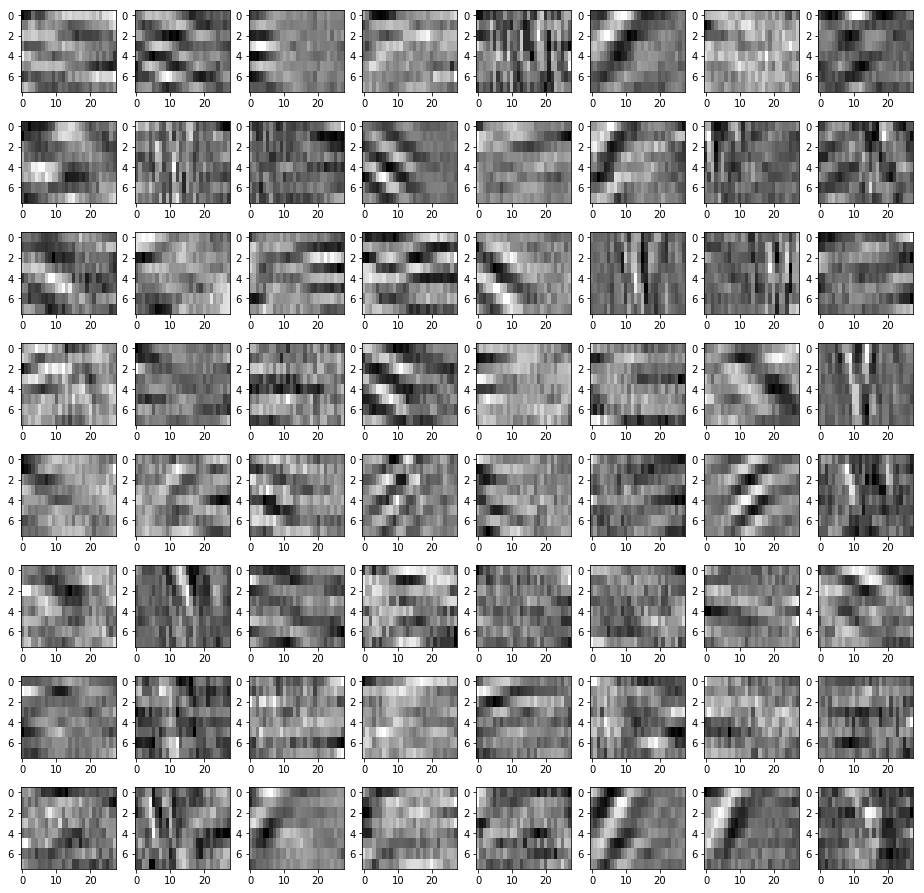

In [97]:
fig = plt.figure(figsize = (16, 16))
for ii in range(64):
    ax = plt.subplot(8, 8, ii + 1)
    ax.imshow(np.transpose(filter_1_weight[:,:,0,ii]), cmap='gray')
    ax.set_aspect(3)

In [95]:
filter_4_weight.shape
for

(5, 2, 128, 128)

In [9]:
wanted_words

'yes,no,up,down,left,right,on,off,stop,go'

In [10]:
from importlib import reload

In [65]:
data_fingerprints_datas.shape

(1, 98, 40, 1)

In [63]:
## actually you can load all of them...oh my...
sess = tf.InteractiveSession()
mfcc_tensor = current_graph.get_tensor_by_name('mfcc:0')
data_centered_tensor = current_graph.get_tensor_by_name('rescale_fingerprints/Sub:0')
data_out_norm_tensor = current_graph.get_tensor_by_name('rescale_fingerprints/truediv:0')
data_finger_prints_tensor = current_graph.get_tensor_by_name('Reshape_1:0')
input_layer_tensor = current_graph.get_tensor_by_name('wav_data:0')
# Why there are two mfcc and two audio_spectrum? input data is called twice?

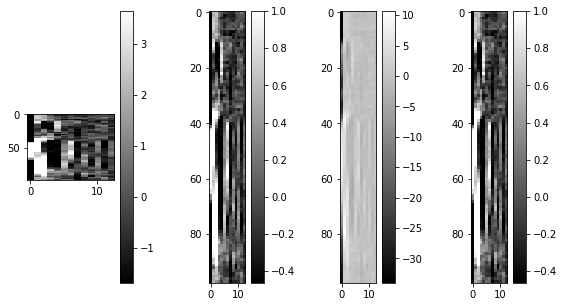

In [92]:
wav = wav_path_test[7]
with open(wav, 'rb') as wav_file:
            wav_data = wav_file.read()
mfcc_data, data_centered, data_out_norm, data_fingerprints_datas = sess.run([mfcc_tensor, data_centered_tensor,data_out_norm_tensor,data_finger_prints_tensor ],
                                                   {input_layer_tensor: wav_data})
fig = plt.figure(figsize= (9, 5))
ax1 = plt.subplot(1, 4, 1)
cax1 = ax1.imshow(data_centered[0,:,0:13], cmap='gray')
ax1.set_aspect(0.1)
fig.colorbar(cax1)
plt.colorbar
ax2 = plt.subplot(1,4,2)
cax2 = ax2.imshow(data_out_norm [0,:,0:13], cmap='gray')
fig.colorbar(cax2)
ax3 = plt.subplot(1,4,3)
cax3 = ax3.imshow(mfcc_data[0,:,0:13],cmap = 'gray' )
fig.colorbar(cax3)
ax4 = plt.subplot(1,4,4)
cax4 = ax4.imshow(data_fingerprints_datas[0,:,0:13, 0],cmap = 'gray' )
fig.colorbar(cax4)


In [21]:
from matplotlib import pyplot as plt
%matplotlib inline


In [39]:
mfcc_data.shape

(1, 98, 40)

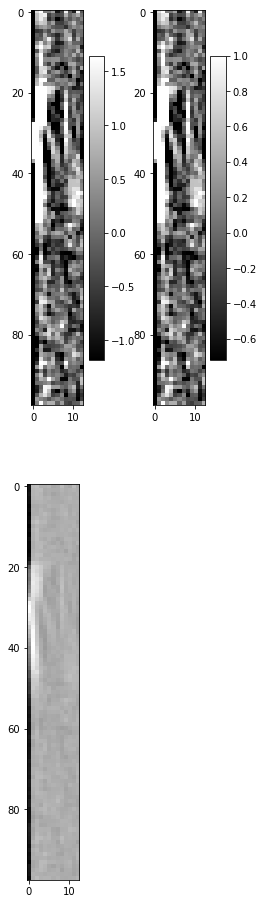

In [40]:
data_centered.shape
